In [1]:
function CC()
    z = [
        0.07, 0.09, 0.12, 0.17, 0.179, 0.199, 0.2,
        0.27, 0.28, 0.352, 0.38, 0.3802, 0.4,
        0.4004, 0.4247, 0.44, 0.4497, 0.47, 0.4783,
        0.48, 0.51, 0.593, 0.6, 0.61, 0.68, 0.73,
        0.781, 0.875, 0.88, 0.9, 1.037, 1.3,
        1.363, 1.43, 1.53, 1.75, 1.965
    ]

    data = [
        69.0, 69.0, 68.6, 83.0, 75.0, 75.0, 72.9,
        77.0, 88.8, 83.0, 81.5, 83.0, 95.0, 77.0,
        87.1, 82.6, 92.8, 89.0, 80.9, 97.0, 90.4,
        104.0, 87.9, 97.3, 92.0, 97.3, 105.0,
        125.0, 90.0, 117.0, 154.0, 168.0, 160.0,
        177.0, 140.0, 202.0, 186.5
    ]

    err = [
        19.6, 12.0, 26.2, 8.0, 4.0, 5.0, 29.6,
        14.0, 36.6, 14.0, 1.9, 13.5, 17.0, 10.2,
        11.2, 7.8, 12.9, 23.0, 9.0, 62.0, 1.9,
        13.0, 6.1, 2.1, 8.0, 7.0, 12.0, 17.0,
        40.0, 23.0, 20.0, 17.0, 33.6, 18.0,
        14.0, 40.0, 50.4
    ]

    cov = zeros(length(z), length(z))
    for i in 1:length(z)
        cov[i, i] = err[i]^2
    end

    return (
        data_name = "CC",
        z = z,
        data = data,
        cov = cov
    )
end


CC (generic function with 1 method)

In [2]:
function BOSSDR12()
    z = [0.38, 0.51, 0.61]
    data = [1512.39, 1975.22, 2306.68, 81.2087, 90.9029, 98.9647, 0.49749, 0.457523, 0.436148]
    cov = [3.63049e+00 1.80306e+00 9.19842e-01 9.71342e+00 7.75546e+00 5.97897e+00 2.79185e-02 1.24050e-02 4.75548e-03; 
           1.80306e+00 3.77146e+00 2.21471e+00 4.85105e+00 1.19729e+01 9.73184e+00 9.28354e-03 2.22588e-02 1.05956e-02;
           9.19842e-01 2.21471e+00 4.37982e+00 2.43394e+00 6.71715e+00 1.60709e+01 1.01870e-03 9.71991e-03 2.14133e-02;
           9.71342e+00 4.85105e+00 2.43394e+00 5.00049e+02 2.94536e+02 1.42011e+02 3.91498e-01 1.51597e-01 4.36366e-02;
           7.75546e+00 1.19729e+01 6.71715e+00 2.94536e+02 7.02299e+02 4.32750e+02 1.95890e-01 3.88996e-01 1.81786e-01;
           5.97897e+00 9.73184e+00 1.60709e+01 1.42011e+02 4.32750e+02 1.01718e+03 3.40803e-02 2.46111e-01 4.78570e-01;
           2.79185e-02 9.28354e-03 1.01870e-03 3.91498e-01 1.95890e-01 3.40803e-02 2.03355e-03 8.11829e-04 2.64615e-04;
           1.24050e-02 2.22588e-02 9.71991e-03 1.51597e-01 3.88996e-01 2.46111e-01 8.11829e-04 1.42289e-03 6.62824e-04;
           4.75548e-03 1.05956e-02 2.14133e-02 4.36366e-02 1.81786e-01 4.78570e-01 2.64615e-04 6.62824e-04 1.18576e-03]
    return (data_name = "BOSSDR12", z = z, data = data, cov = cov)
end

BOSSDR12 (generic function with 1 method)

In [3]:
using LimberJack
zs = range(0, 2.5, length=100);
cosmo1 = Cosmology();
cosmo2 = Cosmology(Ωm=0.40, Ωb=0.05, h=0.70, ns=0.56, s8=0.71);
cosmo3 = Cosmology(Ωm=0.40, Ωb=0.1, h=0.70, ns=0.56, s8=0.71);
H1 = cosmo1.cpar.h*100*Ez(cosmo1, zs);
H2 = cosmo2.cpar.h*100*Ez(cosmo2, zs);
H3 = cosmo3.cpar.h*100*Ez(cosmo3, zs);

In [4]:
function to_err(cov)
    return sqrt.(collect(diag(cov)))
end

to_err (generic function with 1 method)

In [5]:
cc = CC();
bossdr12 = BOSSDR12();

In [6]:
typeof(bossdr12.cov)

Matrix{Float64} (alias for Array{Float64, 2})

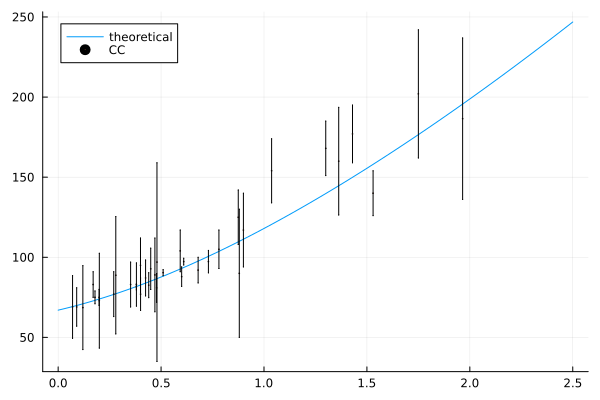

In [7]:
using LinearAlgebra
using Plots 
plot(zs, H1, label="theoretical")
plot!(cc.z, cc.data, yerr = to_err(cc.cov), ms=0.5, seriestype=:scatter, label="CC")


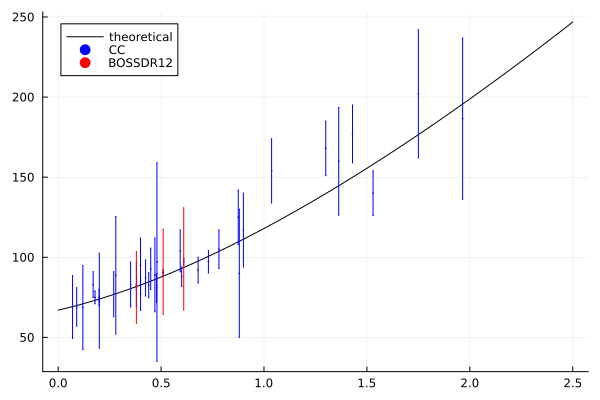

In [8]:
plot(zs, H1, label="theoretical", lc=:black)
plot!(cc.z, cc.data, yerr = to_err(cc.cov), ms=0.5, seriestype=:scatter, label="CC", msc=:blue)
plot!(bossdr12.z, bossdr12.data[4:6], yerr = (to_err(bossdr12.cov))[4:6], ms=0.5, seriestype=:scatter, label="BOSSDR12", msc=:red)

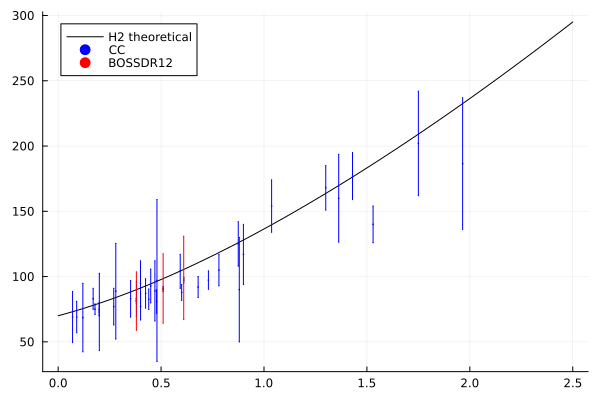

In [9]:
plot(zs, H2, label="H2 theoretical", lc=:black)
plot!(cc.z, cc.data, yerr = to_err(cc.cov), ms=0.5, seriestype=:scatter, label="CC", msc=:blue)
plot!(bossdr12.z, bossdr12.data[4:6], yerr = (to_err(bossdr12.cov))[4:6], ms=0.5, seriestype=:scatter, label="BOSSDR12", msc=:red)

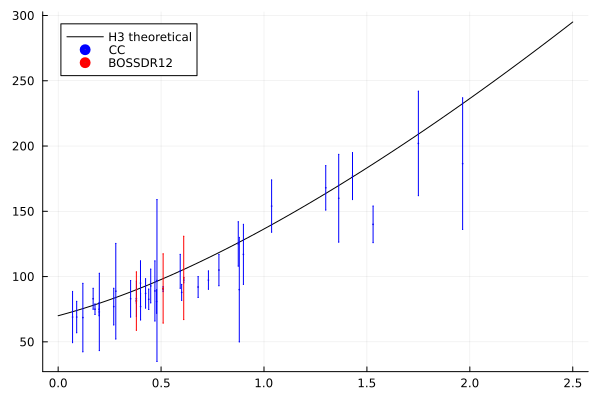

In [10]:
plot(zs, H3, label="H3 theoretical", lc=:black)
plot!(cc.z, cc.data, yerr = to_err(cc.cov), ms=0.5, seriestype=:scatter, label="CC", msc=:blue)
plot!(bossdr12.z, bossdr12.data[4:6], yerr = (to_err(bossdr12.cov))[4:6], ms=0.5, seriestype=:scatter, label="BOSSDR12", msc=:red)

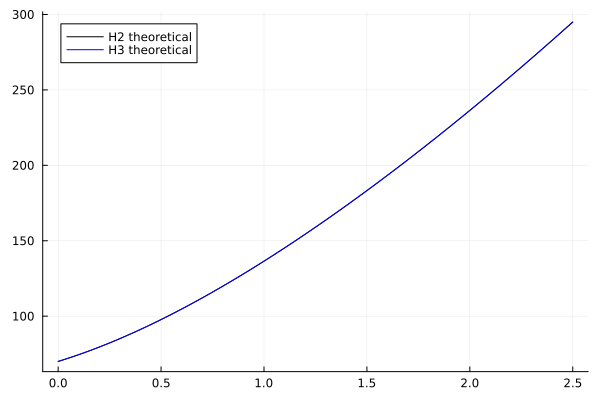

In [11]:
plot(zs, H2, label="H2 theoretical", lc=:black)
plot!(zs, H3, label="H3 theoretical", lc=:blue)


In [12]:
isequal(H2,H3)

true